Current Plan- Use IPL 2009-2018 Data to predict 2019 IPL matches and man of the match/ best bowler.etc.
The prediction is done taking into consideration the player’s performance as well as the team performance.this report aims at studying the problem of predicting the game results before the game has started based on the statistics and data available from the data set. The study uses the Indian Premier League data set of all 8 seasons played till now i.e. from 2008 to 2016.
here are different ways to do the prediction. The prediction can be done taking into
consideration the player’s performance as well as the team performance. There are many
unpredictable things that happen in a cricket game like matches being washed out due to rain, a key player getting injured before the game, players changing their teams, etc. Sometimes a key player also gets inured during the game and hence is not able to take further part in the game. All these factors do affect the prediction to some extent. The report discusses a methodology that I followed for the game result prediction. The methodology consists of first the attribute selection algorithms which trim down the list of attributes to only important ones and then the data mining algorithms which can be applied on those attributes. The game prediction problem that I am studying does not take into consideration the player’s performance but it does take into consideration the team’s past performance at a high level extent along with the other factors like
toss winner, toss decision, home support, etc. The attribute selection techniques consist of the wrapper method and the ranker method. The data mining algorithms that are used are Decision Tree (J48), Random Forest, Naïve Bayes, K-Nearest Neighbor. The data mining tool used in the project is WEKA and it is a freely available data mining tool which has good support for a number of different data mining algorithms.

## Exploratory Data Analysis
Questions:
How many matches we’ve got in the dataset?
How many seasons we’ve got in the dataset?
Which Team had won by maximum runs?
Which Team had won by maximum wicket?
Which Team had won by closest Margin (minimum runs)?
Which Team had won by minimum wicket?
Which Season had most number of matches?
Which IPL Team is more successful?
Has Toss-winning helped in winning matches?


In [3]:
import numpy as np # numerical computing 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visualization
import seaborn as sns #modern visualization

In [5]:
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [6]:
file_path = '/home/g1/Documents/Cricket/ipl/'
matches = pd.read_csv(file_path+'matches.csv')

In [9]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [12]:
matches.shape

(636, 18)

In [15]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [17]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [20]:
matches['id'].max()

636

In [23]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [24]:
len(matches['season'].unique())

10

In [25]:
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [28]:
matches.iloc[43]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [29]:
matches.iloc[matches['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

Which Team had won by (closest margin) minimum runs?
To know the team that was won by the closest margin, we have to do the opposite of what we’ve done in the above steps. But there’s a caveat in that. In Cricket, if the team that’s batting second wins the match (by chasing), it’ll be said “Team second won by x number of wickets” and if the team that’s bowling second (batted first) wins the match (by defending their score), it’ll be said “Team first won by x number of runs”. Hence, the minimum win by runs will always be 0 and the minimum win by wickets will also always be 0 in a tournament since sometimes chasing team or sometimes the team that batted first could win. To overcome this caveat, we just have to apply a simple workaround as you can see below.
Instead of just getting the minimum score (which always would be 0), we have subsetted the data that has win_by_runs greater than or equal to 1 (there by eliminating the zero-issue).

In [30]:
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

Which Team had won by (closest margin) minimum wickets?

In [31]:
matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

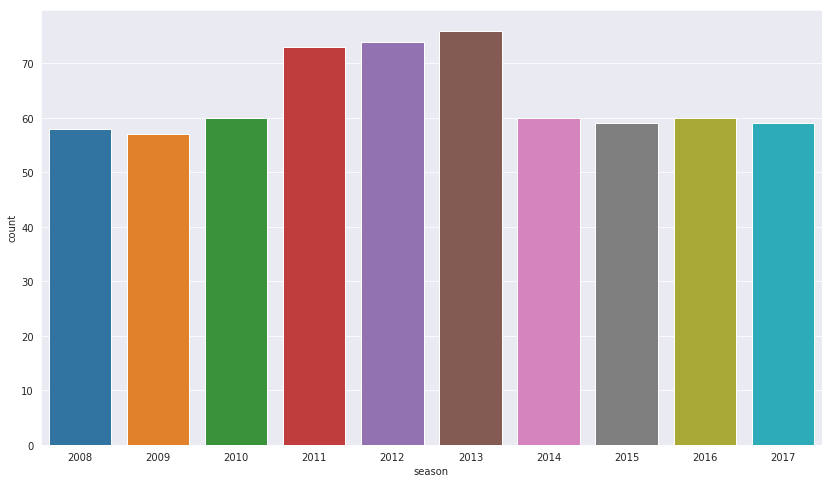

In [42]:
sns.countplot(x='season',data=matches)

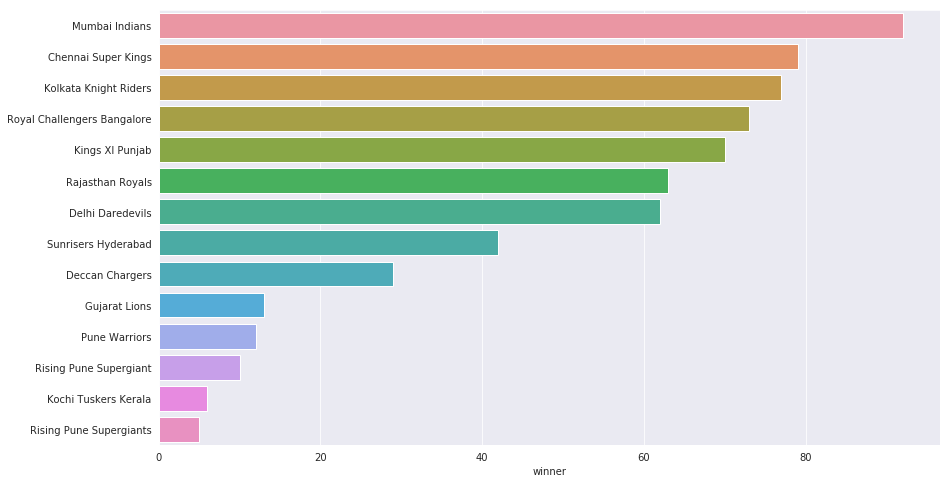

In [48]:
#sns.countplot(x='winner',data=matches)
#plt.show
data=matches.winner.value_counts()
sns.barplot(y=data.index,x=data,orient='h')

### Man of the match

In [62]:
top_players=matches.player_of_match.value_counts()[:10]
top_players


CH Gayle          18
YK Pathan         16
AB de Villiers    15
DA Warner         15
SK Raina          14
RG Sharma         14
MS Dhoni          13
G Gambhir         13
MEK Hussey        12
AM Rahane         12
Name: player_of_match, dtype: int64

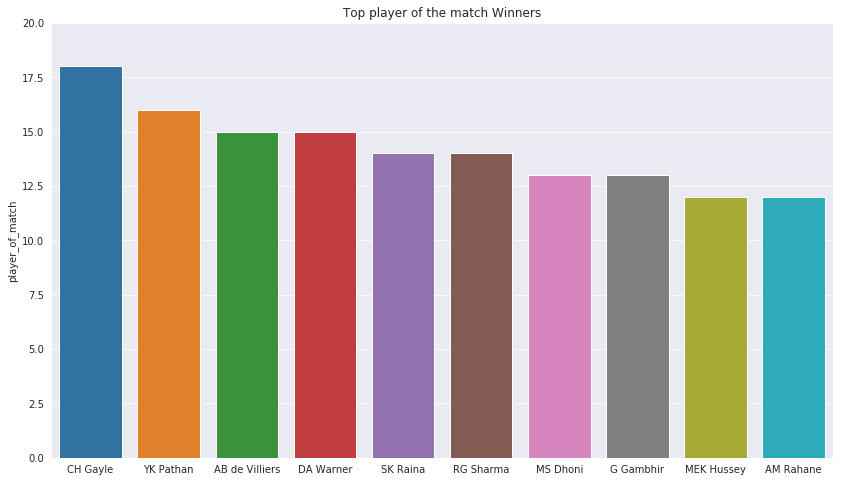

In [65]:
fig,ax=plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
sns.barplot(x=top_players.index,y=top_players,orient='v')
plt.show()

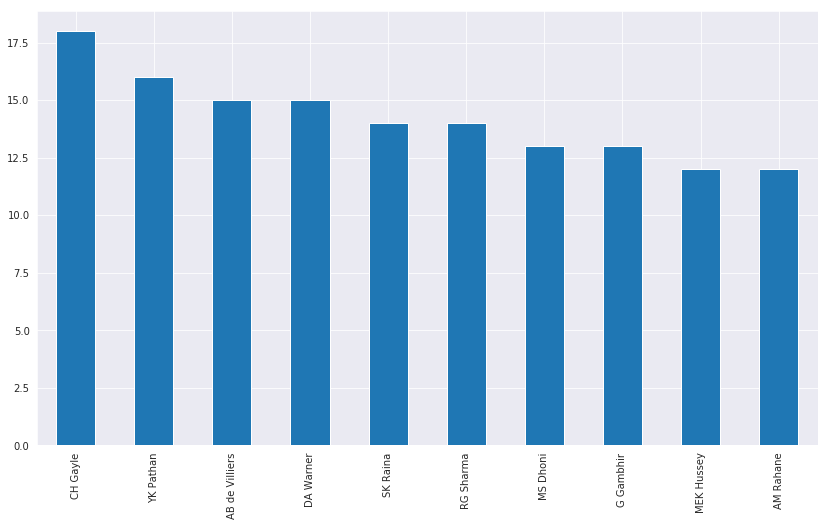

In [66]:
top_players.plot.bar()

In [69]:
ss=matches['toss_winner']==matches['winner']
ss.groupby(ss).size()

False    311
True     325
dtype: int64

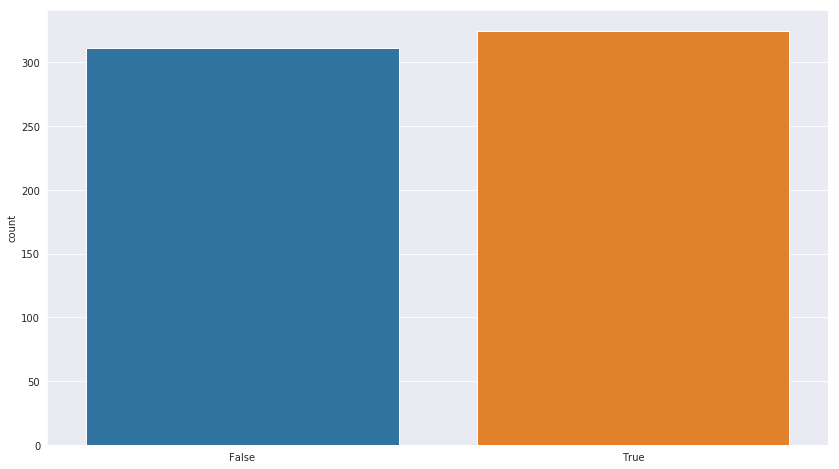

In [71]:
sns.countplot(ss)